In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [34]:
#load and read csv file
data_module= pd.read_csv("bike_sharing.csv")
data_module.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [36]:
data_module.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
data_module= data_module[['registered','cnt']]

In [38]:
data_module.dtypes

registered    int64
cnt           int64
dtype: object

In [39]:
data_module.isnull().sum()

registered    0
cnt           0
dtype: int64

In [40]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (12165, 2)
test (5214, 2)


In [41]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [42]:
train_module= pd.read_csv("train.csv")
train_module.head()

,registered,cnt
0,226,250
1,16,18
2,90,107
3,126,145
4,758,857


In [43]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [44]:
x_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [45]:
print("x train data:",x_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (8515, 1)
y train data: (8515,)


In [46]:
#feature scalling on training set
sc_x = StandardScaler()
sc_y = StandardScaler()
# x_train= sc_x.fit_transform(x_train)
x_train = sc_x.fit_transform(x_train.reshape(-1, 1) )
y_train = sc_y.fit_transform(y_train.reshape(-1, 1) )
# y_train= sc_y.fit_transform(y_train)

In [47]:
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
y_pred_tr=regressor.predict(x_train)
y_pred_tr

array([-0.3779297 ,  1.0655071 , -0.43578777, ...,  0.20113363,
       -0.86651275, -0.58143207])

In [49]:
Accuracy = sklearn.metrics.r2_score(y_train,y_pred_tr)*100
print(Accuracy)

94.87977972530663


In [50]:
file = open("train_data.pkl",'wb')
pickle.dump(regressor,file)

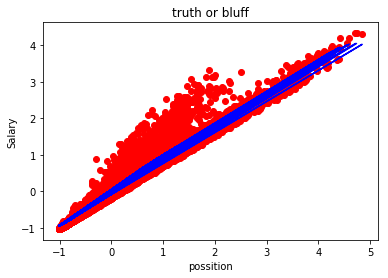

In [51]:
# #visualizing the SVR result
# plt.scatter(x_train,y_train,color='red')
# plt.plot(x_train,regressor.predict(x_train),color='blue')
# plt.title("truth or bluff")
# plt.xlabel("possition")
# plt.ylabel("Salary")
# plt.show()

In [52]:
cv_data.to_csv('cv_data.csv',index=False)

In [53]:
# loading cross validation dataset file
cv_data = pd.read_csv('cv_data.csv')
cv_data.head()

,registered,cnt
0,40,42
1,92,148
2,34,37
3,189,224
4,6,7


In [54]:
cv_data_x= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [55]:
print("cross validate data x",cv_data_x.shape)
print("cross validate data y",cv_data_y.shape)

cross validate data x (3650, 1)
cross validate data y (3650,)


In [56]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_y.fit_transform(cv_data_y.reshape(-1,1))

In [57]:
y_pred_cv=regressor.predict(cv_data_x)
y_pred_cv

array([-0.73610038, -0.42149681, -0.77064665, ...,  0.45113059,
       -0.78757784, -0.93045369])

In [58]:
# regressor= SVR(kernel='rbf')
# regressor.fit(x_train,y_train)

In [59]:
Accuracy = sklearn.metrics.r2_score(cv_data_y,y_pred_cv)*100
print(Accuracy)

94.83509539216843


In [60]:
file1= open("train_data.pkl",'rb')
regressor=pickle.load(file1)

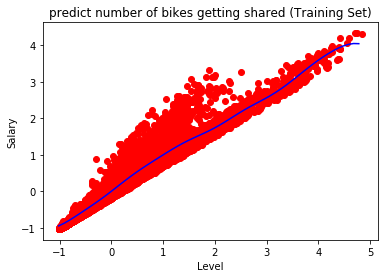

In [61]:
# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict number of bikes getting shared (Training Set)')
plt.xlabel('temprature')
plt.ylabel('bike count')
plt.show()


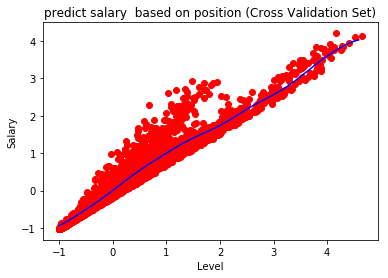

In [62]:
# visualizing the testing set result
x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(cv_data_x,cv_data_y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict salary  based on position (Cross Validation Set)')
plt.xlabel('temprature')
plt.ylabel('bike count')
plt.show()